# Machine Learning with Tree-Based Models in Python - Part 3
- Voting Classifier
    - Same training set, different algorithms
    - Hard voting - majority voting
    - Soft voting - averaging probabilities
- Bagging (Bootstrap Aggregation)
    - One algorithm, different subset of training set
    - All features used for training and prediction
    - Base estimators: Decision Tree, Logistic Regression, Neural Network, ...
    - In classification aggregates predictions by majority voting
    - In regression aggregates predictions through averaging
    - Bagging - random sampling with replacement
    - Pasting - random sampling without replacement (losowanie bez zwracania)
- Out of Bag Evaluation
    - In Bagging some samples can be used several times for one model (on average 63% training samples are used)
    - Other samples may not be used at all (ramaining 37% are Out-of-bag samples)
    - OOB samples can be used to evaluate each model
    - OOB score is average of all OOB scores for each model
- Random Forest
    - One algorithm, different subset of training set
    - Not all features used for training and prediction one model (without replacement)
    - Base estimator: Decision Tree
    - In classification aggregates predictions by majority voting
    - In regression aggregates predictions through averaging
    - Random sampling with replacement
    - Out of Bag samples 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor

SEED = 1

## Datasets

### Indian Liver Patient

In [5]:
df_indian_liver = pd.read_csv('../datasets/indian_liver_patient.csv')
df_indian_liver = df_indian_liver.dropna()

In [7]:
df_indian_liver = pd.get_dummies(df_indian_liver, drop_first=True)

### Bike Sharing Demand

In [43]:
df_bike = pd.read_csv('../datasets/bike-sharing-demand.csv')

## Bagging and Random Forests
Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

### Define the bagging classifier
In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [21]:
X, y = df_indian_liver.iloc[:,:-1], df_indian_liver.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [27]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)

In [28]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=SEED)

### Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [29]:
# Fit bc to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [30]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [33]:
# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.74


### Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [35]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=SEED)

In [36]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=SEED)

### OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [37]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=8,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=1,
   

In [38]:
# Predict test set labels
y_pred = bc.predict(X_test)

In [39]:
# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

In [40]:
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

In [41]:
# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.747, OOB accuracy: 0.756


### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [60]:
X, y = df_bike.iloc[:, :-1], df_bike.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [62]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=SEED)

In [63]:
# Fit rf to the training set    
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

### Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [64]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [65]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

In [66]:
# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.00


### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

In [54]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)

In [55]:
# Sort importances
importances_sorted = importances.sort_values()

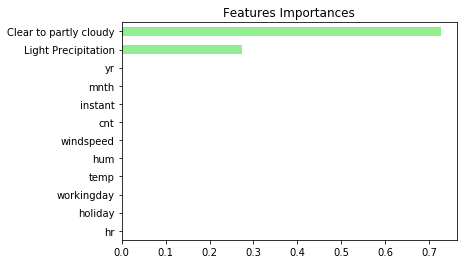

In [58]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()